# Final Project Mini Example-Miles per Gallon

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Classes in Python
VimeoVideo('653063374', width=720, height=480)

https://vimeo.com/653063374

In [45]:
import pandas as pd
import seaborn as sns
import skimpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [46]:
df = sns.load_dataset('mpg')

In [47]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Goal: Predict Origin by all other variables (except name)

In [4]:
skimpy.skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 398    │ │ float64     │ 4     │                                    │
│ │ Number of columns │ 9      │ │ int64       │ 3     │                                    │
│ └───────────────────┴────────┘ │ object      │ 2     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃       ┃        ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃       ┃        ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ mpg    │ 0.0    │ 1.0    │ 24.0   │ 7.8   │ 9.0    │ 18.0   │ 29.0  │ 47.0   │ ▅█▇▅▂ │  │
│ │        │        │        │        │       │        │        │       │        │ ▁     │  │
│ │ cylind │ 0.0    │ 1.0    │ 5.5    │ 1.7   │ 3.0    │ 4.0    │ 8.0   │ 8.0    │  █ ▃  │  │
│ │ ers    │        │        │        │       │        │        │       │        │ ▄     │  │
│ │ displa │ 0.0    │ 1.0    │ 190.0  │ 100.0 │ 68.0   │ 100.0  │ 260.0 │ 460.0  │ █▃▃▂▂ │  │
│ │ cement │        │        │        │       │        │        │       │        │ ▁     │  │
│ │ horsep │ 6.0    │ 0.98   │ 100.0  │ 38.0  │ 46.0   │ 75.0   │ 130.0 │ 230.0  │ ▅█▂▃▁ │  │
│ │ ower   │        │        │        │       │        │        │       │        │ ▁     │  │
│ │ weight │ 0.0    │ 1.0    │ 3000.0 │ 850.0 │ 1600.0 │ 2200.0 │ 3600. │ 5100.0 │ ▇█▆▅▄ │  │
│ │        │        │        │        │       │        │        │ 0     │        │ ▁     │  │
│ │ accele │ 0.0    │ 1.0    │ 16.0   │ 2.8   │ 8.0    │ 14.0   │ 17.0  │ 25.0   │ ▁▄█▆▁ │  │
│ │ ration │        │        │        │       │        │        │       │        │       │  │
│ │ model_ │ 0.0    │ 1.0    │ 76.0   │ 3.7   │ 70.0   │ 73.0   │ 79.0  │ 82.0   │ ▅▆▅▆▆ │  │
│ │ year   │        │        │        │       │        │        │       │        │ █     │  │
│ └────────┴────────┴────────┴────────┴───────┴────────┴────────┴───────┴────────┴───────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

## Deal with missing data

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [49]:
# Fill missing data with mean value of column
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [50]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
# Get list of continuous variables for plotting
continuous_vars = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

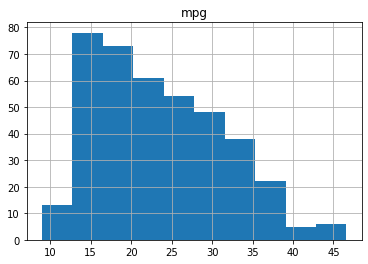

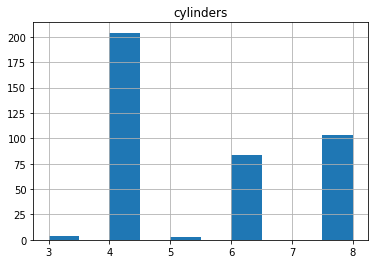

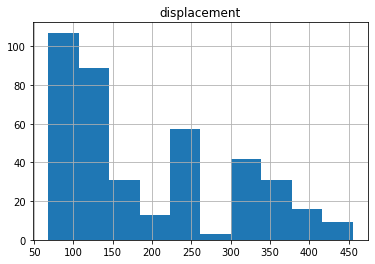

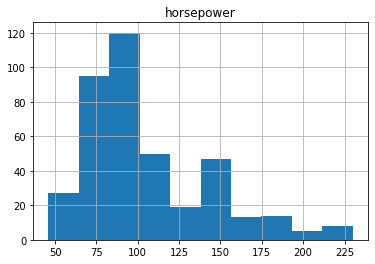

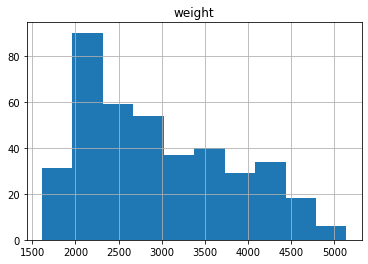

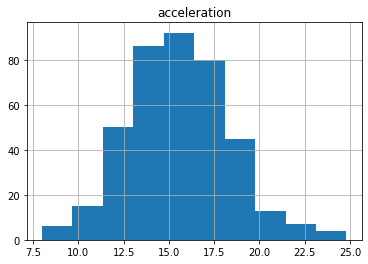

In [51]:
for cv in continuous_vars:
    df[cv].hist()
    plt.title(cv)
    plt.show()

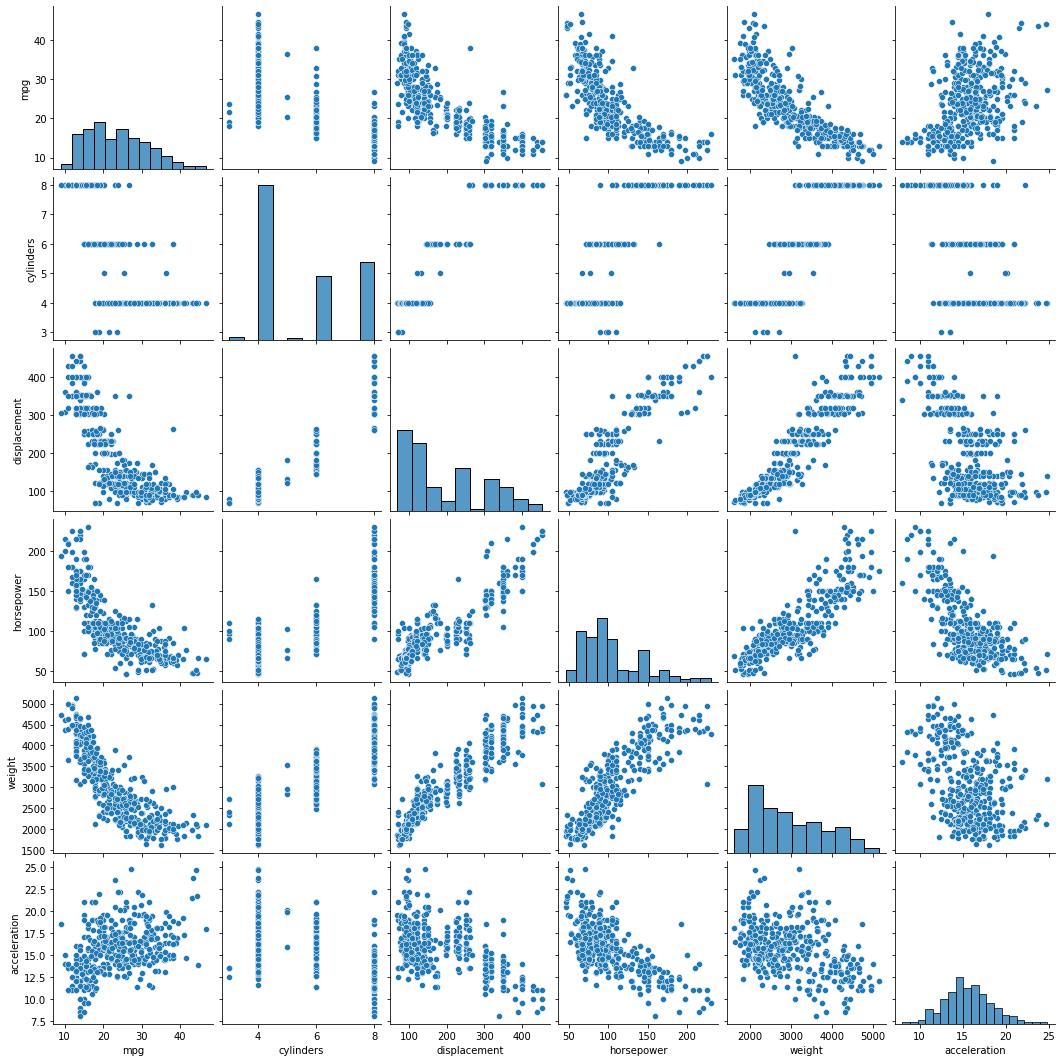

In [10]:
sns.pairplot(df[continuous_vars])

<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

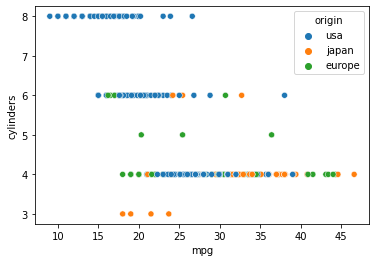

In [52]:
sns.scatterplot(x='mpg', y='cylinders', hue='origin', data=df)

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

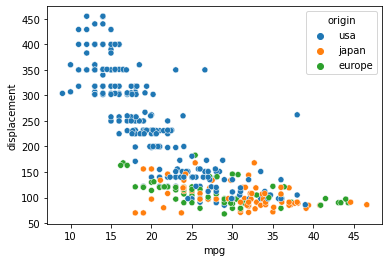

In [12]:
sns.scatterplot(x='mpg', y='displacement', hue='origin', data=df)

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

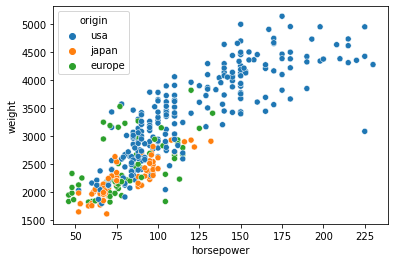

In [13]:
sns.scatterplot(x='horsepower', y='weight', hue='origin', data=df)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

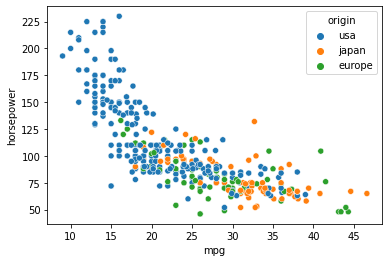

In [14]:
sns.scatterplot(x='mpg', y='horsepower', hue='origin', data=df)

<AxesSubplot:>

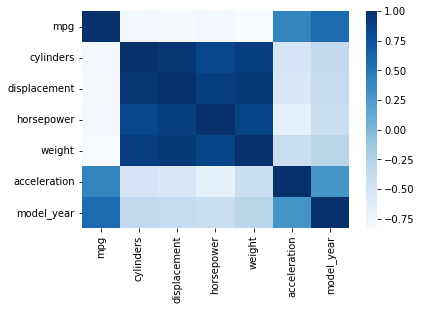

In [55]:
sns.heatmap(df.corr(), cmap='Blues')

<AxesSubplot:xlabel='model_year'>

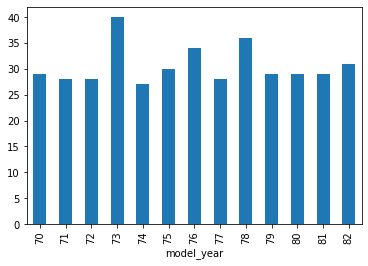

In [54]:
df.groupby(['model_year']).size().plot(kind='bar')

In [17]:
# Dummy code years 
dummy_years = pd.get_dummies(df['model_year'], drop_first=True)
dummy_years

,71,72,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,0,1
394,0,0,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,0,1
396,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
# merge dummy codes and data
df2 = pd.concat([df, dummy_years], axis=1)

In [57]:
# View combined data
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,71,...,73,74,75,76,77,78,79,80,81,82
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0,...,0,0,0,0,0,0,0,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,0,...,0,0,0,0,0,0,0,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0,...,0,0,0,0,0,0,0,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Define our target
y = df2['origin']

In [21]:
# Create our X array (predictors)
X = df2.drop(columns=['origin', 'model_year', 'name'])

In [58]:
X.columns = X.columns.astype(str)

In [59]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,71,72,73,74,75,76,77,78,79,80,81,82
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [33]:
# Instantiate our classifier
clf = RandomForestClassifier()

In [34]:
# Fit on our training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Make predictions
preds = clf.predict(X_test)

In [36]:
preds

array(['usa', 'usa', 'usa', 'usa', 'japan', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'japan', 'usa', 'japan', 'usa', 'europe',
       'usa', 'usa', 'japan', 'europe', 'usa', 'europe', 'usa', 'usa',
       'usa', 'europe', 'usa', 'japan', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'japan', 'europe', 'usa', 'usa', 'europe', 'europe',
       'usa', 'usa', 'usa', 'usa', 'japan', 'europe', 'japan', 'usa',
       'usa', 'usa', 'usa', 'usa', 'japan', 'usa', 'japan', 'europe',
       'japan', 'usa', 'usa', 'usa', 'usa', 'usa', 'japan', 'usa', 'usa',
       'japan', 'japan', 'usa', 'europe', 'usa', 'europe', 'usa', 'usa',
       'usa', 'usa', 'usa', 'japan', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'japan', 'usa', 'europe', 'usa', 'japan', 'usa', 'usa',
       'europe', 'japan', 'usa', 'japan', 'japan', 'europe', 'japan',
       'usa', 'usa', 'japan', 'japan', 'japan', 'europe', 'japan', 'usa',
       'usa', 'usa', 'japan', 'usa', 'usa', 'usa', 'japan', 'usa'

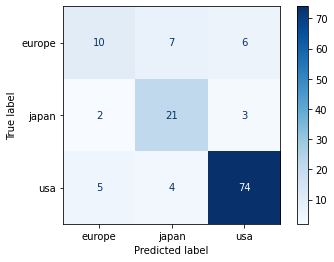

In [37]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')

In [38]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      europe       0.59      0.43      0.50        23
       japan       0.66      0.81      0.72        26
         usa       0.89      0.89      0.89        83

    accuracy                           0.80       132
   macro avg       0.71      0.71      0.71       132
weighted avg       0.79      0.80      0.79       132



<AxesSubplot:>

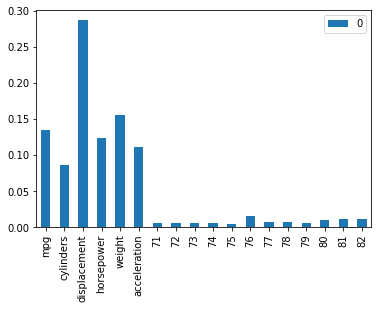

In [40]:
pd.DataFrame(clf.feature_importances_, index=clf.feature_names_in_).plot(kind='bar')

[Text(0, 0, 'mpg'),
 Text(1, 0, 'cylinders'),
 Text(2, 0, 'displacement'),
 Text(3, 0, 'horsepower'),
 Text(4, 0, 'weight'),
 Text(5, 0, 'acceleration'),
 Text(6, 0, '71'),
 Text(7, 0, '72'),
 Text(8, 0, '73'),
 Text(9, 0, '74'),
 Text(10, 0, '75'),
 Text(11, 0, '76'),
 Text(12, 0, '77'),
 Text(13, 0, '78'),
 Text(14, 0, '79'),
 Text(15, 0, '80'),
 Text(16, 0, '81'),
 Text(17, 0, '82')]

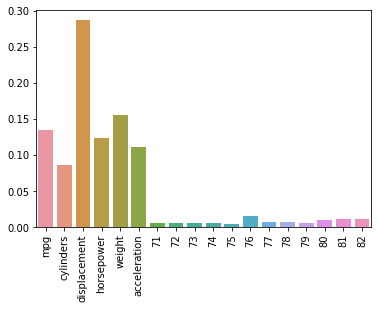

In [44]:
g =sns.barplot(x=clf.feature_names_in_, y=clf.feature_importances_)
g.set_xticklabels(g.get_xticklabels(), rotation=90)